# Author: Aditya Gajula
## Title : Capstone: UIC Spring-2021
## Client: Ekta-flow LLC
## Module: Survival Analysis

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

pd.options.display.max_rows=10

**Importing all datasets**

In [2]:
ml_demo = pd.read_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/ML Analysis - Demographic info.csv')
ml_main = pd.read_excel('C:/Users/Adity/OneDrive/Desktop/Capstone/M L Analysis main list.xlsx')
other_demo = pd.read_excel('C:/Users/Adity/OneDrive/Desktop/Capstone/other demographic info.xlsx')
#giving_history = pd.read_excel('/content/drive/MyDrive/Sigma Chi Capstone Spring 2021/Giving history Feb 2021.xls')
gift_officer = pd.read_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/Sigma Chi Giftofficer .csv')

C:\Users\Adity\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,33,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### transaction history file

In [3]:
#dfs = [ID	TRANSACTION_DATE	SOURCE_CODE	CAMPAIGN_CODE	INVOICE_CREDITS	CO_ID]
# xlsx = pd.ExcelFile('C:/Users/Adity/OneDrive/Desktop/Capstone/Giving history Feb 2021.xls')
xlsx = pd.ExcelFile('C:/Users/Adity/Downloads/GivingHistoryFeb21_modified.xlsx')
giving_history = pd.read_excel(xlsx, "Sheet1")
giving_history_2 = pd.read_excel(xlsx, "Sheet2")
giving_history_3 = pd.read_excel(xlsx, "Sheet3")
giving_history = giving_history.append(giving_history_2)
giving_history = giving_history.append(giving_history_3)

In [4]:
print(ml_demo.shape)
print(ml_main.shape)
print(other_demo.shape)
print(giving_history.shape)
print(gift_officer.shape)

(174978, 58)
(33040, 8)
(248267, 11)
(173643, 6)
(2492, 3)


#### Basic view of the Data

In [5]:
ml_demo.head()

,ID,City,State,Zip,Total Donations (2016),Number of Gifts(2016),First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount,...,Political Donations Rating,Total Donations,Total Donations Rating,Business Ownership,Co. Ownership Value Rating,Co. Sales Volume,Aircraft Owner,Boat Owner,Children,Board Member
0,226495,Fresno,CA,93727,NaN,0.0,NaN,NaN,NaN,NaN,...,6,$300 - $750,6,$1MM-$5MM,3,$5MM-$10MM,N,N,NaN,No
1,296146,Mission Hills,KS,66208,NaN,0.0,NaN,NaN,NaN,NaN,...,0,Unable to rate,0,Unable to rate,0,Unable to rate,N,N,N,No
2,381217,Libertyville,IL,60048,NaN,0.0,NaN,NaN,NaN,NaN,...,0,Unable to rate,0,$1-$500K,1,$1-$500K,N,Y,Y,No
3,224241,Park City,UT,84098,NaN,0.0,NaN,NaN,NaN,NaN,...,0,Unable to rate,0,Unable to rate,0,Unable to rate,N,N,N,No
4,287806,Aurora,OH,44202,365.0,14.0,5/28/92,25.0,4/21/03,30.0,...,10,$5K - $10K,10,$1-$500K,1,$1MM-$5MM,N,N,NaN,No


In [6]:
ml_main.head()

,iMIS ID,Chapter,Grad Year,ML Capacity,ML Likelihood,City,State Province,Zip
0,185653,Delta Psi,1966,10000000,A-High,Syracuse,NY,13210-4144
1,101190,Beta Epsilon,1954,5000000,A-High,Bethesda,MD,20817-1102
2,130445,Beta Psi,1964,5000000,A-High,Minneapolis,MN,55405-2208
3,153687,Phi Phi,1959,5000000,A-High,San Antonio,TX,78204-1317
4,166255,Alpha Xi,1961,5000000,A-High,Denver,CO,80202-3941


Columns useful:

iMIS ID, ML Capacity, ML Likelihood

In [7]:
other_demo.head()

,ID,MEMBER_TYPE,CITY,STATE_PROVINCE,ZIP,COUNTRY,BIRTHDATE,COMPANY,PLEDGE DATE,UNIV,GRADUATION DATE
0,168801,ALUM,Seattle,WA,98126-2746,United States,1944-05-15,Beta Rho,1963-08-23,Montana State University,1966
1,168800,ALUM,Mount Pleasant,MI,48858-3219,United States,1944-05-17,Gamma Epsilon,1963-07-13,Whitman College,1966
2,344951,ALUM,Columbus,OH,43235-2168,United States,1979-02-24,Alpha Pi,1998-05-12,Albion College,2001
3,417812,ALUM,Bemidji,MN,56601-7414,United States,1992-03-15,Beta Zeta,2010-09-19,University of North Dakota,2014
4,223726,ALUM,La Jolla,CA,92037-1932,United States,1951-07-19,Beta Zeta,1970-06-26,University of North Dakota,1973


Columns useful:

ID, Birthdate, Pledge Date

In [8]:
giving_history.head()

,ID,TRANSACTION_DATE,SOURCE_CODE,CAMPAIGN_CODE,INVOICE_CREDITS,CO_ID
0,104167,2015-05-15,ND FF0415,AF,25.0,357395
1,104283,2017-09-26,NaN,4706,1000.0,357375
2,104309,1992-10-06,SUPB3,AF,25.0,357368
3,104309,1990-11-29,1G,AF,10.0,357368
4,104309,2017-12-21,183D,AF,65.0,357368


Columns useful:

ID, TRANSACTION_DATE, INVOICE_CREDITS

In [9]:
gift_officer.head()

,IMIS ID,Donor Chapter,Gift Officer Name
0,328919,Delta Eta,"James C. Lawson, CRMC, CDMC"
1,287451,Alpha Upsilon,"James C. Lawson, CRMC, CDMC"
2,309347,Delta Eta,"James C. Lawson, CRMC, CDMC"
3,272012,Eta Beta,"James C. Lawson, CRMC, CDMC"
4,259414,Delta Xi,"James C. Lawson, CRMC, CDMC"


Columns useful:
All

### ML Main Data preparation

In [10]:
ml_main['iMIS ID'] = ml_main['iMIS ID'].apply(str)
ml_main['Zip'] = ml_main['Zip'].apply(str)
ml_main['Chapter'] = ml_main['Chapter'].astype('category')
ml_main['ML Likelihood'] = ml_main['ML Likelihood'].astype('category')
ml_main['Grad Year'] = ml_main['Grad Year'].apply(str)

In [11]:
ml_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33040 entries, 0 to 33039
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   iMIS ID         33040 non-null  object  
 1   Chapter         33040 non-null  category
 2   Grad Year       33040 non-null  object  
 3   ML Capacity     33040 non-null  int64   
 4   ML Likelihood   33040 non-null  category
 5   City            33040 non-null  object  
 6   State Province  33040 non-null  object  
 7   Zip             33040 non-null  object  
dtypes: category(2), int64(1), object(5)
memory usage: 1.6+ MB


In [12]:
print("Number of Rows(transactions): ", ml_main.shape[0])
print("Number of members: ", ml_main['iMIS ID'].value_counts().shape[0])


print("Number of different Likelihoods: ", ml_main['ML Likelihood'].value_counts().shape[0])

print("Average ML Capacity : ", ml_main['ML Capacity'].mean() , " dollars") #avg donation

print("Lowest ML Capacity: ", int(ml_main['ML Capacity'].min()), ) 
print("Highest ML Capacity: ", int(ml_main['ML Capacity'].max()), )

Number of Rows(transactions):  33040
Number of members:  33040
Number of different Likelihoods:  4
Average ML Capacity :  175345.03631961258  dollars
Lowest ML Capacity:  100000
Highest ML Capacity:  10000000


In [13]:
# Dropping columns which are not useful for analysis

ml_main.drop(['Chapter','Grad Year','City','State Province','Zip'], axis=1, inplace=True)

In [14]:
ml_main = ml_main.rename(columns={'iMIS ID':'ID'})

In [15]:
ml_demo['ID'] = ml_demo['ID'].apply(str)

### Principal Component Analysis:


In [16]:
# Used PCA on all columns that have ratings to reduce the number of dimensions.


pca_rating_subset = ml_demo[['Total Asset Rating','Net Worth Rating','Cash on Hand Rating','Estimated Annual Donation Rating','Gift Capacity Rating','Influence Rating','Income Rating','Pension Rating', 'Real Estate Value Rating','Stock Direct Holdings Rating','Stock Total Value Rating','Charitable Donations Rating', 'Political Donations Rating','Total Donations Rating', 'Co. Ownership Value Rating']]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(pca_rating_subset)
pca = PCA()
ratings_post_pca = pca.fit_transform(pca_rating_subset)
print(pca.singular_values_)
ratings_df = pd.DataFrame(ratings_post_pca, columns=['rating1','rating2','rating3','rating4','rating5','rating6','rating7','rating8',
                                                     'rating9','rating10','rating11','rating12','rating13','rating14', 'rating15'])
rating_pcs = ratings_df[['rating1','rating2','rating3']]
ml_demo['rating1'] = rating_pcs['rating1'].astype(float)
ml_demo['rating2'] = rating_pcs['rating2'].astype(float)
ml_demo['rating3'] = rating_pcs['rating3'].astype(float)

[3288.12024081 1957.32147718 1768.26665136  645.91056485  440.0431055
  379.44803022  292.87278362  227.82649772  201.63494535  169.23190442
  126.59948606  118.93993455  100.4952083    73.96312606   13.81991678]


#### Dropping all ratings columns from the ML demographic info file

In [17]:
ml_demo.drop(['Total Asset Rating','Net Worth Rating','Cash on Hand Rating',
              'Estimated Annual Donation Rating','Gift Capacity Rating',
              'Influence Rating','Income Rating','Pension Rating',
              'Real Estate Value Rating','Stock Direct Holdings Rating',
              'Stock Total Value Rating','Charitable Donations Rating',
              'Political Donations Rating','Total Donations Rating',
              'Co. Ownership Value Rating'], axis=1, inplace=True)

In [18]:
ml_demo['P2G Description'] = ml_demo['P2G Description'].astype('category')
ml_demo['Total Assets'] = ml_demo['Total Assets'].astype('category')
ml_demo['Net Worth'] = ml_demo['Net Worth'].astype('category')
ml_demo['Cash on Hand'] = ml_demo['Cash on Hand'].astype('category')
ml_demo['Estimated Annual Donations'] = ml_demo['Estimated Annual Donations'].astype('category')
ml_demo['Gift Capacity Range'] = ml_demo['Gift Capacity Range'].astype('category')
ml_demo['Gift Capacity - Income'] = ml_demo['Gift Capacity - Income'].astype('category')
ml_demo['Gift Capacity - Real Estate'] = ml_demo['Gift Capacity - Real Estate'].astype('category')
ml_demo['Gift Capacity - Stock'] = ml_demo['Gift Capacity - Stock'].astype('category')
ml_demo['Gift Capacity - Pension'] = ml_demo['Gift Capacity - Pension'].astype('category')
ml_demo['Gift Capacity - Donations'] = ml_demo['Gift Capacity - Donations'].astype('category')
ml_demo['Estimated Gift Capacity'] = ml_demo['Estimated Gift Capacity'].astype('category')
ml_demo['Inclination: Affiliation'] = ml_demo['Inclination: Affiliation'].astype('category')
ml_demo['Inclination: Giving'] = ml_demo['Inclination: Giving'].astype('category')
ml_demo['Bequest'] = ml_demo['Bequest'].astype('category')
ml_demo['Income'] = ml_demo['Income'].astype('category')
ml_demo['Real Estate Value'] = ml_demo['Real Estate Value'].astype('category')
ml_demo['Charitable Donations'] = ml_demo['Charitable Donations'].astype('category')
ml_demo['Total Donations'] = ml_demo['Total Donations'].astype('category')
ml_demo['Boat Owner'] = ml_demo['Boat Owner'].astype('category')
ml_demo['Children'] = ml_demo['Children'].astype('category')
ml_demo['Board Member'] = ml_demo['Board Member'].astype('category')

#### Joining ML Demo and ML main files after removing unnnecessary columns

In [19]:
demo_main = ml_demo.set_index('ID').join(ml_main.set_index('ID'), how='left')

In [20]:
demo_main = demo_main.reset_index()

In [21]:
demo_main['ID'] = demo_main['ID'].apply(str)

In [22]:
demo_main['ML Likelihood'].value_counts()

D-Very Low    18836
C-Low         11698
B-Med          1654
A-High          835
Name: ML Likelihood, dtype: int64

In [23]:
ml_main['ML Likelihood'].value_counts()

D-Very Low    18838
C-Low         11703
B-Med          1658
A-High          841
Name: ML Likelihood, dtype: int64

#### Premliminary data preparation on the Other Demo file

In [24]:
other_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248267 entries, 0 to 248266
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               248267 non-null  int64         
 1   MEMBER_TYPE      248267 non-null  object        
 2   CITY             248267 non-null  object        
 3   STATE_PROVINCE   248267 non-null  object        
 4   ZIP              248267 non-null  object        
 5   COUNTRY          248267 non-null  object        
 6   BIRTHDATE        242762 non-null  datetime64[ns]
 7   COMPANY          248266 non-null  object        
 8   PLEDGE DATE      242822 non-null  datetime64[ns]
 9   UNIV             248267 non-null  object        
 10  GRADUATION DATE  248139 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 20.8+ MB


In [25]:
other_demo['ID'] = other_demo['ID'].apply(str)
other_demo['MEMBER_TYPE'] = other_demo['MEMBER_TYPE'].astype('category')
other_demo['COMPANY'] = other_demo['COMPANY'].astype('category')

In [26]:
other_demo.drop(['MEMBER_TYPE','CITY','STATE_PROVINCE','ZIP','COUNTRY','COMPANY','UNIV'], axis=1, inplace=True)

In [27]:
other_demo = other_demo.rename(columns={'PLEDGE DATE':'Pledge_Date', 'GRADUATION DATE':'Grad_Date'})

In [28]:
other_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248267 entries, 0 to 248266
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           248267 non-null  object        
 1   BIRTHDATE    242762 non-null  datetime64[ns]
 2   Pledge_Date  242822 non-null  datetime64[ns]
 3   Grad_Date    248139 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 7.6+ MB


#### Joining the demo_main dataframe to the other demo file 

In [29]:
demo_main_other = demo_main.set_index('ID').join(other_demo.set_index('ID'), how='left', on='ID')

In [30]:
demo_main_other.head()

,City,State,Zip,Total Donations (2016),Number of Gifts(2016),First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount,P2G Score Combo,...,Children,Board Member,rating1,rating2,rating3,ML Capacity,ML Likelihood,BIRTHDATE,Pledge_Date,Grad_Date
ID,,,,,,,,,,,,,,,,,,,,,
100003,Ogden,UT,84414,NaN,0.0,NaN,NaN,NaN,NaN,1|4,...,N,Yes,1.698402,-8.007107,-1.445530,100000.0,D-Very Low,1944-11-05,1965-01-11,1968
100004,Mendon,UT,84325,NaN,0.0,NaN,NaN,NaN,NaN,2|5,...,Y,No,-0.274064,-6.571190,-1.410640,NaN,NaN,1949-12-03,1969-01-27,1973
100005,Fayetteville,NY,13066,100.0,1.0,9/30/15,100.0,9/30/15,100.0,2|4,...,NaN,No,4.083678,-4.897911,-0.759616,100000.0,C-Low,1947-10-02,1965-12-19,1969
100006,Columbus,OH,43220,NaN,0.0,NaN,NaN,NaN,NaN,1|5,...,NaN,No,5.267880,-4.635410,8.511804,NaN,NaN,1946-04-10,1965-06-26,1968
100007,Morrison,CO,80465,NaN,0.0,NaN,NaN,NaN,NaN,5|0,...,NaN,No,-12.835404,2.395149,2.092142,NaN,NaN,1943-01-23,1962-06-23,1965


In [31]:
demo_main_other = demo_main_other.reset_index() 

In [32]:
demo_main_other['ID'] = demo_main_other['ID'].apply(str)

#### Premliminary data preparation on the Gift Officer file

In [33]:
gift_officer['IMIS ID'] = gift_officer['IMIS ID'].apply(str)
gift_officer['Gift Officer Name'] = gift_officer['Gift Officer Name'].astype('category')
gift_officer = gift_officer.rename(columns={'IMIS ID':'ID', 'Donor Chapter':'Chapter','Gift Officer Name':'GiftOfficer'})
gift_officer.shape

(2492, 3)

In [34]:
gift_officer.head()

,ID,Chapter,GiftOfficer
0,328919,Delta Eta,"James C. Lawson, CRMC, CDMC"
1,287451,Alpha Upsilon,"James C. Lawson, CRMC, CDMC"
2,309347,Delta Eta,"James C. Lawson, CRMC, CDMC"
3,272012,Eta Beta,"James C. Lawson, CRMC, CDMC"
4,259414,Delta Xi,"James C. Lawson, CRMC, CDMC"


In [35]:
gift_officer_agg = gift_officer.groupby('GiftOfficer').agg({'ID':lambda y: y.count()})
gift_officer_agg

,ID
GiftOfficer,
"Frank J. Raymond, MSW",205
"Gregory Morgan, M.Ed.",547
"Jackson E. Philbrick, II",440
"James C. Lawson, CRMC, CDMC",777
Jeffrey Rothenberg,309
"Samuel Barrett Smith, CFRE",214


#### Joining the demo_main_other dataframe to the gift officers file 
#### "demo_main_other_go" is created by joining all the data together from the 4 data files

In [36]:
demo_main_other_go = demo_main_other.set_index('ID').join(gift_officer.set_index('ID'), how='left')

In [37]:
demo_main_other_go = demo_main_other_go.reset_index()

In [38]:
demo_main_other_go.GiftOfficer.value_counts()

James C. Lawson, CRMC, CDMC    676
Gregory Morgan, M.Ed.          473
Jackson E. Philbrick, II       419
Jeffrey Rothenberg             258
Samuel Barrett Smith, CFRE     199
Frank J. Raymond, MSW          182
Name: GiftOfficer, dtype: int64

**Adding giving history as grouped on ID**

In [39]:
giving_history['Year'] = giving_history['TRANSACTION_DATE'].dt.strftime('%Y')
giving_history['Year'] = giving_history['Year'].apply(str)

In [40]:
giving_history_agg = giving_history.groupby('ID').agg({'INVOICE_CREDITS': lambda p:p.sum(),
                                                       'CO_ID':lambda y: y.count(),
                                                       'TRANSACTION_DATE': lambda date: (date.max() - date.min()).days,
                                                       'Year': lambda d:d.nunique()})

giving_history_agg = giving_history_agg.reset_index()

In [41]:
giving_history_agg = giving_history_agg.rename(columns={'INVOICE_CREDITS':'DonatedAmt', 'CO_ID':'NumDonations','TRANSACTION_DATE':'DaysBtwDonations', 'Year':'NumYearsDonated'})

In [42]:
#Adjust for calculation error. When a person donates only once, that's the only date for the person

giving_history_agg['DaysBtwDonations'] = giving_history_agg['DaysBtwDonations'].replace(0,1)

In [43]:
giving_history_agg.head()

,ID,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated
0,100005,100.0,1,1,1
1,100006,300.0,3,432,2
2,100008,1460.0,20,17795,16
3,100014,25.0,1,1,1
4,100026,75.0,2,110,1


In [44]:
# Some additional variables created for the analysis

giving_history_agg['AvgDonationVal'] = giving_history_agg['DonatedAmt']/giving_history_agg['NumDonations']

donation_frequency = sum(giving_history_agg['NumDonations'])/giving_history_agg.shape[0]

repeat_rate = giving_history_agg[giving_history_agg['NumDonations']>1].shape[0]/giving_history_agg.shape[0]

churn_rate = 1-repeat_rate

giving_history_agg['DonorLifetimeValue'] = (giving_history_agg['AvgDonationVal']*donation_frequency)/churn_rate

giving_history_agg['Percentile_DonationAmt'] = giving_history_agg.DonatedAmt.rank(pct=True)
giving_history_agg['Percentile_DonationFreq'] = giving_history_agg.NumDonations.rank(pct=True)
giving_history_agg['Percentile_DLV'] = giving_history_agg.DonorLifetimeValue.rank(pct=True)

In [45]:
giving_history_agg.head()

,ID,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
0,100005,100.0,1,1,1,100.0,1529.624736,0.460663,0.192744,0.744423
1,100006,300.0,3,432,2,100.0,1529.624736,0.662983,0.585396,0.744423
2,100008,1460.0,20,17795,16,73.0,1116.626057,0.870802,0.935673,0.651744
3,100014,25.0,1,1,1,25.0,382.406184,0.189824,0.192744,0.298207
4,100026,75.0,2,110,1,37.5,573.609276,0.399358,0.463091,0.461461


In [46]:
giving_history_agg['ID'] = giving_history_agg['ID'].apply(str)

### Full_df is the master dataset containing the list of IDs and their attributes from all the data files

In [47]:
full_df = demo_main_other_go.set_index('ID').join(giving_history_agg.set_index('ID'), how='left')

In [48]:
full_df = full_df.reset_index()

In [49]:
full_df.head()

,ID,City,State,Zip,Total Donations (2016),Number of Gifts(2016),First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount,...,GiftOfficer,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
0,100003,Ogden,UT,84414,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100004,Mendon,UT,84325,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100005,Fayetteville,NY,13066,100.0,1.0,9/30/15,100.0,9/30/15,100.0,...,NaN,100.0,1.0,1.0,1.0,100.0,1529.624736,0.460663,0.192744,0.744423
3,100006,Columbus,OH,43220,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,300.0,3.0,432.0,2.0,100.0,1529.624736,0.662983,0.585396,0.744423
4,100007,Morrison,CO,80465,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#full_df.to_csv('/content/SigmaChiFullDataset.csv', encoding='utf-8', index=True)

In [51]:
full_df.shape

(174978, 62)

In [52]:
full_df.DonatedAmt.value_counts()

 25.0        3333
 50.0        1886
 100.0       1713
 10.0         938
 5.0          895
             ... 
 3180.0         1
 2649.0         1
 7345.0         1
-33.0           1
 228500.0       1
Name: DonatedAmt, Length: 3161, dtype: int64

#### loocating all the negative and zero dolalr transactions

In [53]:
less_than_1 = full_df.loc[full_df.DonatedAmt<1]

In [54]:
print(gift_officer['ID'].nunique())
print(other_demo['ID'].nunique())
print(ml_main['ID'].nunique())
print(ml_demo['ID'].nunique())
print('')
print(demo_main['ID'].nunique())
print(demo_main_other['ID'].nunique())
print(demo_main_other_go['ID'].nunique())
print(full_df['ID'].nunique())
print(less_than_1['ID'].nunique())


2492
248267
33040
174972

174972
174972
174972
174972
40


In [55]:
less_than_1.DonatedAmt.value_counts()

 0.0      38
-33.0      1
-185.0     1
Name: DonatedAmt, dtype: int64

In [56]:
less_than_1.NumDonations.value_counts()

2.0    34
1.0     3
4.0     2
5.0     1
Name: NumDonations, dtype: int64

In [57]:
less_than_1.DaysBtwDonations.value_counts()

1.0      14
5.0       2
23.0      2
7.0       2
71.0      1
         ..
27.0      1
32.0      1
4.0       1
64.0      1
291.0     1
Name: DaysBtwDonations, Length: 24, dtype: int64

In [58]:
full_df.isnull().sum()

ID                              0
City                          266
State                        4274
Zip                           870
Total Donations (2016)     148413
                            ...  
AvgDonationVal             148449
DonorLifetimeValue         148449
Percentile_DonationAmt     148449
Percentile_DonationFreq    148449
Percentile_DLV             148449
Length: 62, dtype: int64

In [59]:
full_df.drop(['Total Donations (2016)','First Gift Date','First Gift Amount',
              'Last Gift Date','Last Gift Amount','P2G Score Combo',
              'P2G Score (first digit)','P2G Score (second digit)','Pension',
              'Stock Direct Holdings','Stock Total Value','Political Donations',
              'Co. Sales Volume','Business Ownership'], axis=1, inplace=True)

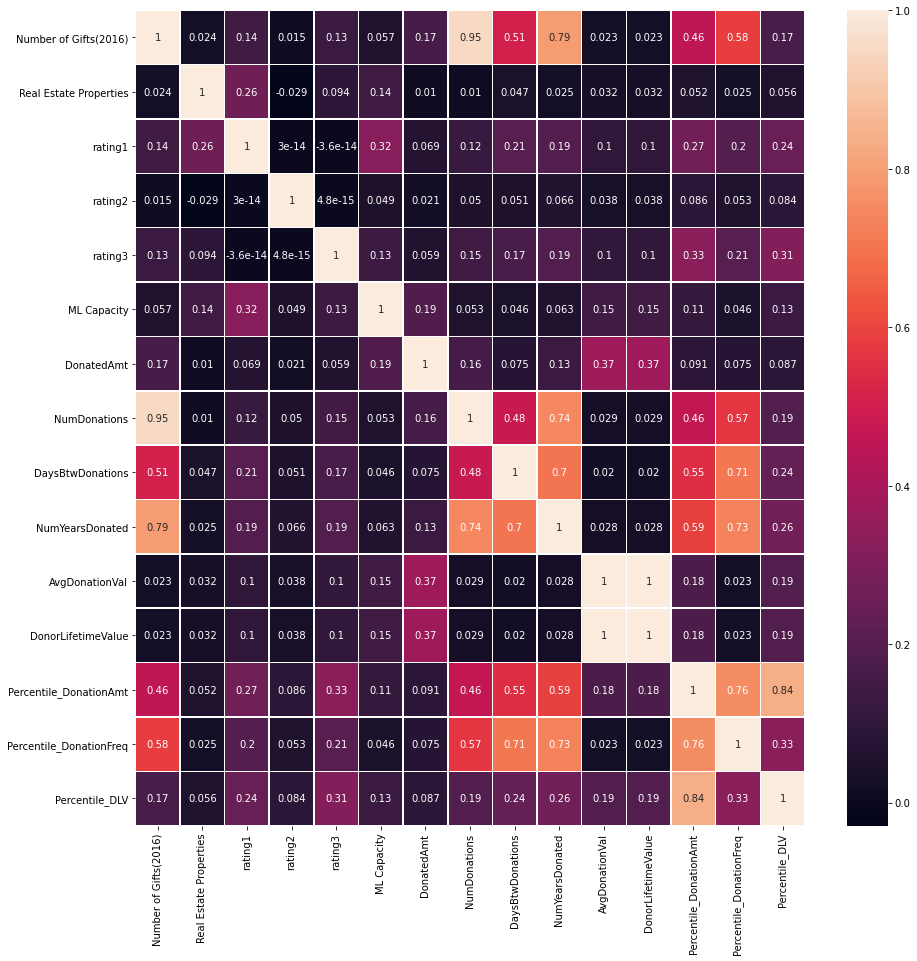

In [60]:
full_df_corr = full_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(full_df_corr, annot=True, linewidths=.5)
plt.show()

#### Final set of features used for analysis: some columns are dropped according to the model results

In [61]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174978 entries, 0 to 174977
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID                           174978 non-null  object        
 1   City                         174712 non-null  object        
 2   State                        170704 non-null  object        
 3   Zip                          174108 non-null  object        
 4   Number of Gifts(2016)        174971 non-null  float64       
 5   P2G Description              174978 non-null  category      
 6   Total Assets                 174978 non-null  category      
 7   Net Worth                    174978 non-null  category      
 8   Cash on Hand                 174978 non-null  category      
 9   Estimated Annual Donations   174978 non-null  category      
 10  Gift Capacity Range          174978 non-null  category      
 11  Gift Capacity - Income    

In [62]:
subset_df = full_df.drop(['ID', 'City', 'State', 'Zip','Number of Gifts(2016)',
                          'Children', 'Real Estate Properties','AvgDonationVal'], axis=1)

In [63]:
subset_df['Bequest'].fillna('N', inplace=True)

In [64]:
subset_df.isnull().sum()

P2G Description                    0
Total Assets                       0
Net Worth                          0
Cash on Hand                       0
Estimated Annual Donations         0
                               ...  
NumYearsDonated               148449
DonorLifetimeValue            148449
Percentile_DonationAmt        148449
Percentile_DonationFreq       148449
Percentile_DLV                148449
Length: 40, dtype: int64

In [65]:
giving_history_agg.shape

(29451, 10)

In [66]:
giving_history.shape

(173643, 7)

In [67]:
giving_history.ID.nunique()


29451

In [68]:
subset_df.shape

(174978, 40)

### Cluster_df contains all the IDs from transaction histoory and the rest of the data files, final set of IDs to be taken into the analysis

In [69]:
cluster_df = full_df.loc[full_df['ID'].isin(giving_history_agg['ID'])]

In [70]:
cluster_df.ID.nunique()

26529

In [71]:
cluster_df.shape

(26529, 48)

In [72]:
cluster_df = cluster_df.drop(['City', 'State', 'Zip','Number of Gifts(2016)',
                          'Children', 'Real Estate Properties','AvgDonationVal'], axis=1)

In [73]:
cluster_df.isnull().values.sum()

91697

In [74]:
cluster_df.apply(lambda x: x.count(), axis=1)

2         39
3         37
5         39
8         39
13        39
          ..
174972    36
174973    34
174974    34
174975    36
174976    34
Length: 26529, dtype: int64

In [75]:
print(cluster_df['ID'].nunique())
print(cluster_df['DonorLifetimeValue'].nunique())

26529
4946


# Survival Analysis

In [76]:
# sm = survival modelling df

sm = cluster_df.copy()

In [77]:
sm.shape

(26529, 41)

####  ['ID', 'rating1', 'rating2', 'rating3', 'ML Capacity', 'Pledge_Date',
####  'DonatedAmt', 'NumDonations', 'DaysBtwDonations', 'NumYearsDonated',
####  'DonorLifetimeValue', 'Percentile_DonationAmt',
####  'Percentile_DonationFreq', 'Percentile_DLV'],
  

In [78]:
sm.columns

Index(['ID', 'P2G Description', 'Total Assets', 'Net Worth', 'Cash on Hand',
       'Estimated Annual Donations', 'Gift Capacity Range',
       'Gift Capacity - Income', 'Gift Capacity - Real Estate',
       'Gift Capacity - Stock', 'Gift Capacity - Pension',
       'Gift Capacity - Donations', 'Estimated Gift Capacity',
       'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Income',
       'Real Estate Value', 'Charitable Donations', 'Total Donations',
       'Aircraft Owner', 'Boat Owner', 'Board Member', 'rating1', 'rating2',
       'rating3', 'ML Capacity', 'ML Likelihood', 'BIRTHDATE', 'Pledge_Date',
       'Grad_Date', 'Chapter', 'GiftOfficer', 'DonatedAmt', 'NumDonations',
       'DaysBtwDonations', 'NumYearsDonated', 'DonorLifetimeValue',
       'Percentile_DonationAmt', 'Percentile_DonationFreq', 'Percentile_DLV'],
      dtype='object')

In [79]:
sm.drop(['Total Assets', 'Net Worth', 'Cash on Hand', 'Estimated Annual Donations', 'Gift Capacity Range', 'Gift Capacity - Income', 'Gift Capacity - Real Estate', 'Gift Capacity - Pension', 'Gift Capacity - Donations'], axis=1, inplace=True)

In [80]:
sm.drop(['Estimated Gift Capacity', 'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Real Estate Value', 'Charitable Donations', 'Aircraft Owner'], axis=1, inplace=True)

In [81]:
sm.drop(['Income', 'Total Donations'], axis=1, inplace=True)

In [82]:
sm.drop(['P2G Description', 'Gift Capacity - Stock', 'Boat Owner', 'Board Member'], axis=1, inplace=True)

In [83]:
sm.drop(['BIRTHDATE', 'ML Likelihood', 'Grad_Date', 'Chapter', 'GiftOfficer'], axis=1, inplace=True)

In [84]:
sm.reset_index()

,index,ID,rating1,rating2,rating3,ML Capacity,Pledge_Date,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
0,2,100005,4.083678,-4.897911,-0.759616,100000.0,1965-12-19,100.00,1.0,1.0,1.0,1529.624736,0.460663,0.192744,0.744423
1,3,100006,5.267880,-4.635410,8.511804,NaN,1965-06-26,300.00,3.0,432.0,2.0,1529.624736,0.662983,0.585396,0.744423
2,5,100008,3.543948,-6.745982,2.429344,100000.0,1948-08-30,1460.00,20.0,17795.0,16.0,1116.626057,0.870802,0.935673,0.651744
3,8,100014,5.072813,-7.448551,-1.568798,200000.0,1967-12-10,25.00,1.0,1.0,1.0,382.406184,0.189824,0.192744,0.298207
4,13,100026,6.812179,-0.552169,-3.324686,100000.0,1967-10-12,75.00,2.0,110.0,1.0,573.609276,0.399358,0.463091,0.461461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26524,174972,428543,2.005375,-5.994812,2.202351,NaN,NaT,1006.00,7.0,1636.0,4.0,2198.289263,0.830634,0.785491,0.820057
26525,174973,428956,1.604823,-3.519413,6.394828,NaN,NaT,289071.16,44.0,2485.0,8.0,100493.271982,0.999287,0.987437,0.993820
26526,174974,439174,3.441970,-4.457706,7.011980,NaN,NaT,968.55,12.0,2372.0,7.0,1234.598365,0.810329,0.875081,0.676989
26527,174975,439751,4.523042,-6.692841,3.855336,100000.0,NaT,125.00,2.0,1406.0,2.0,956.015460,0.518896,0.463091,0.620896


In [85]:
sm.describe()

,rating1,rating2,rating3,ML Capacity,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
count,26529.000000,26529.000000,26529.000000,8.726000e+03,2.652900e+04,26529.000000,26529.000000,26529.000000,2.652900e+04,26529.000000,26529.000000,26529.000000
mean,4.017705,-0.192740,1.476983,2.000573e+05,2.558650e+03,6.018885,3542.097667,4.335972,4.532630e+03,0.505542,0.506837,0.502599
std,6.829255,4.595530,4.276899,4.387779e+05,4.471947e+04,11.795202,4917.552099,5.691799,3.482855e+04,0.289332,0.279192,0.287789
min,-12.835404,-11.007005,-8.207558,1.000000e+05,-1.850000e+02,1.000000,1.000000,1.000000,-1.414903e+03,0.000034,0.192744,0.000034
25%,0.750576,-4.519654,-1.483888,1.000000e+05,2.800000e+01,1.000000,1.000000,1.000000,3.824062e+02,0.252470,0.192744,0.298207
50%,4.515357,0.350192,1.249226,1.000000e+05,1.200000e+02,2.000000,915.000000,2.000000,6.883311e+02,0.508658,0.463091,0.500968
75%,8.405664,3.242149,3.921710,2.000000e+05,5.750000e+02,6.000000,5847.000000,5.000000,1.529625e+03,0.757462,0.753387,0.744423
max,25.027433,14.014804,17.856513,1.000000e+07,5.957436e+06,419.000000,23337.000000,49.000000,3.059249e+06,1.000000,1.000000,1.000000


In [86]:
sm = sm.set_index('ID')

In [87]:
# preserving the survival modelling df by taking a copy

sm1 = sm.copy()

In [88]:
sm1.drop(['Pledge_Date'], axis=1, inplace=True)

In [89]:
sm1.fillna(sm1.mean(), inplace=True)

In [90]:
a = sm1.DaysBtwDonations.value_counts()
a.sort_values()

3021.0        1
8180.0        1
1963.0        1
4037.0        1
2722.0        1
           ... 
731.0        17
12783.0      20
365.0        23
10227.0      53
1.0        9998
Name: DaysBtwDonations, Length: 9024, dtype: int64

In [91]:
# Using Days between donations as a criterion (event_column) to conduct survival analysis

sm1.loc[sm1['DaysBtwDonations'] <= 3500, 'DaysBtwDonations'] = 0
sm1.loc[sm1['DaysBtwDonations'] > 3500, 'DaysBtwDonations'] = 1

In [92]:
#print(sm_dummy['ID'].nunique())
print(sm['DonorLifetimeValue'].nunique())

4946


In [93]:
sm1.head()

,rating1,rating2,rating3,ML Capacity,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
ID,,,,,,,,,,,,
100005,4.083678,-4.897911,-0.759616,100000.000000,100.0,1.0,0.0,1.0,1529.624736,0.460663,0.192744,0.744423
100006,5.267880,-4.635410,8.511804,200057.300023,300.0,3.0,0.0,2.0,1529.624736,0.662983,0.585396,0.744423
100008,3.543948,-6.745982,2.429344,100000.000000,1460.0,20.0,1.0,16.0,1116.626057,0.870802,0.935673,0.651744
100014,5.072813,-7.448551,-1.568798,200000.000000,25.0,1.0,0.0,1.0,382.406184,0.189824,0.192744,0.298207
100026,6.812179,-0.552169,-3.324686,100000.000000,75.0,2.0,0.0,1.0,573.609276,0.399358,0.463091,0.461461


### importing libraries related to survival analysis: lifelines package

In [94]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes 
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [95]:
sm1.isnull()

,rating1,rating2,rating3,ML Capacity,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
ID,,,,,,,,,,,,
100005,False,False,False,False,False,False,False,False,False,False,False,False
100006,False,False,False,False,False,False,False,False,False,False,False,False
100008,False,False,False,False,False,False,False,False,False,False,False,False
100014,False,False,False,False,False,False,False,False,False,False,False,False
100026,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
428543,False,False,False,False,False,False,False,False,False,False,False,False
428956,False,False,False,False,False,False,False,False,False,False,False,False
439174,False,False,False,False,False,False,False,False,False,False,False,False


#### Using Cox Proportional Hazards model to estimate the survival rates of the donors

In [96]:
# Using Cox Proportional Hazards model
# Taking sm1 as input survival modelling df to the Cox model 

cph = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph.fit(sm1, 'NumYearsDonated', event_col='DaysBtwDonations')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 26529 total observations, 17968 right-censored observations>
             duration col = 'NumYearsDonated'
                event col = 'DaysBtwDonations'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 26529
number of events observed = 8561
   partial log-likelihood = -67229.97
         time fit was run = 2021-05-06 05:56:37 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
rating1                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rating2                  -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
rating3                  -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
ML Capacity              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DonatedAmt                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumDonations             -0.06       0.94       0.00            -0.06            -0.06                 0.94                 0.94
DonorLifetimeValue        0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Percentile_DonationAmt   -1.29       0.28       0.06            -1.40            -1.17                 0.25                 0.31
Percentile_DonationFreq  -2.19       0.11       0.06            -2.32            -2.07                 0.10                 0.13
Percentile_DLV            0.12       1.13       0.04             0.03             0.21                 1.04                 1.23

                             z      p   -log2(p)
covariate                                       
rating1                   0.72   0.47       1.09
rating2                  -1.53   0.13       2.98
rating3                  -0.34   0.73       0.45
ML Capacity              -1.43   0.15       2.70
DonatedAmt                0.11   0.91       0.14
NumDonations            -48.68 <0.005        inf
DonorLifetimeValue        3.05 <0.005       8.77
Percentile_DonationAmt  -21.95 <0.005     352.38
Percentile_DonationFreq -33.90 <0.005     834.56
Percentile_DLV            2.74   0.01       7.34
---
Concordance = 0.88
Partial AIC = 134479.94
log-likelihood ratio test = 6772.93 on 10 df
-log2(p) of ll-ratio test = inf

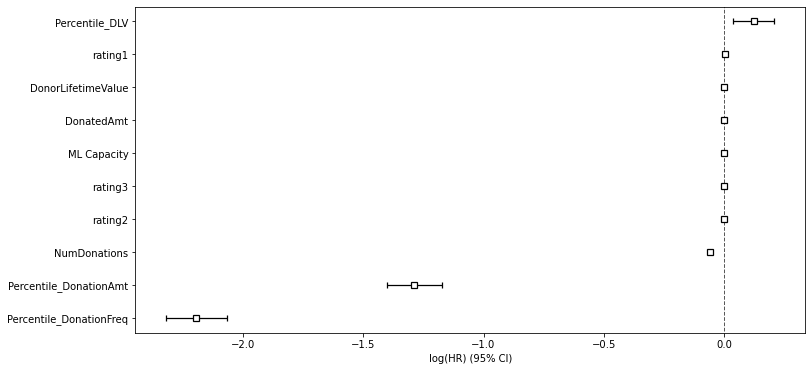

In [97]:
cph.plot()

In [98]:
len(sm)

26529

In [99]:
## We want to visualize the Survival curve at the customer level. Therefore, we have selected only 100 rows).

tr1_rows = sm1.iloc[0:100]
tr1_rows

,rating1,rating2,rating3,ML Capacity,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
ID,,,,,,,,,,,,
100005,4.083678,-4.897911,-0.759616,100000.000000,100.0,1.0,0.0,1.0,1529.624736,0.460663,0.192744,0.744423
100006,5.267880,-4.635410,8.511804,200057.300023,300.0,3.0,0.0,2.0,1529.624736,0.662983,0.585396,0.744423
100008,3.543948,-6.745982,2.429344,100000.000000,1460.0,20.0,1.0,16.0,1116.626057,0.870802,0.935673,0.651744
100014,5.072813,-7.448551,-1.568798,200000.000000,25.0,1.0,0.0,1.0,382.406184,0.189824,0.192744,0.298207
100026,6.812179,-0.552169,-3.324686,100000.000000,75.0,2.0,0.0,1.0,573.609276,0.399358,0.463091,0.461461
...,...,...,...,...,...,...,...,...,...,...,...,...
101260,-4.854270,-2.908777,0.358047,200057.300023,5.0,1.0,0.0,1.0,76.481237,0.026349,0.192744,0.030848
101267,5.301797,2.768768,7.829789,200057.300023,25.0,1.0,0.0,1.0,382.406184,0.189824,0.192744,0.298207
101276,8.666438,-5.979106,9.716727,500000.000000,1000.0,1.0,0.0,1.0,15296.247357,0.820974,0.192744,0.956114


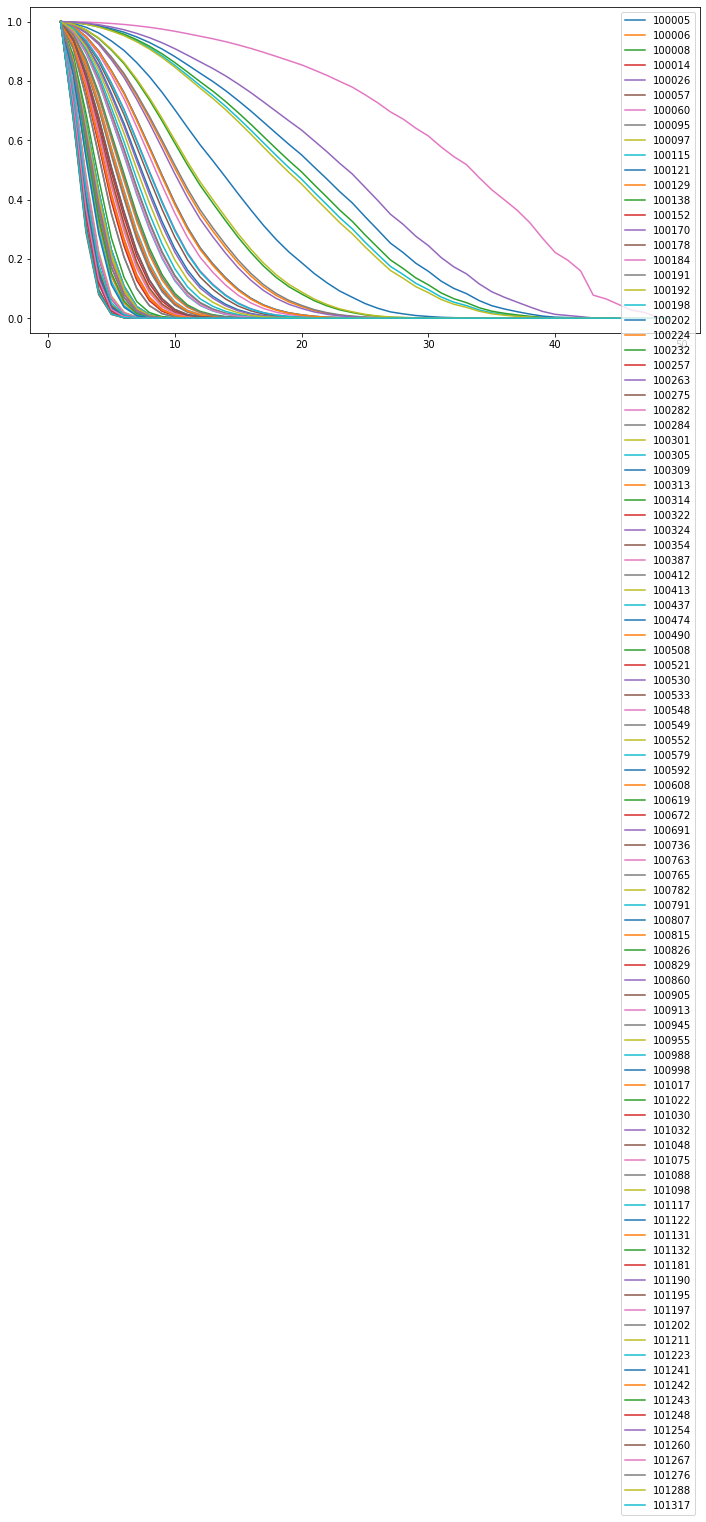

In [100]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.

cph.predict_survival_function(tr1_rows).plot()

In [101]:
## Survival rates of all the donors.

tr_rows = sm1.iloc[0:26529]
tr_rows

,rating1,rating2,rating3,ML Capacity,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV
ID,,,,,,,,,,,,
100005,4.083678,-4.897911,-0.759616,100000.000000,100.00,1.0,0.0,1.0,1529.624736,0.460663,0.192744,0.744423
100006,5.267880,-4.635410,8.511804,200057.300023,300.00,3.0,0.0,2.0,1529.624736,0.662983,0.585396,0.744423
100008,3.543948,-6.745982,2.429344,100000.000000,1460.00,20.0,1.0,16.0,1116.626057,0.870802,0.935673,0.651744
100014,5.072813,-7.448551,-1.568798,200000.000000,25.00,1.0,0.0,1.0,382.406184,0.189824,0.192744,0.298207
100026,6.812179,-0.552169,-3.324686,100000.000000,75.00,2.0,0.0,1.0,573.609276,0.399358,0.463091,0.461461
...,...,...,...,...,...,...,...,...,...,...,...,...
428543,2.005375,-5.994812,2.202351,200057.300023,1006.00,7.0,0.0,4.0,2198.289263,0.830634,0.785491,0.820057
428956,1.604823,-3.519413,6.394828,200057.300023,289071.16,44.0,0.0,8.0,100493.271982,0.999287,0.987437,0.993820
439174,3.441970,-4.457706,7.011980,200057.300023,968.55,12.0,0.0,7.0,1234.598365,0.810329,0.875081,0.676989


In [102]:
# Survival curve for all the donors
# cannot be visualized for all donors since the list is very big

cph.predict_survival_function(tr_rows).plot()

ValueError: Image size of 706x397957 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x432 with 1 Axes>

## Survival Rates of Donors over the next 50 years

In [103]:
survival_rates = cph.predict_survival_function(tr_rows)
survival_rates = np.transpose(survival_rates)
survival_rates

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0
100005,1.0,0.777929,0.462186,0.207818,0.065556,0.015984,0.002439,0.000253,1.649554e-05,6.610490e-07,...,1.195904e-245,1.999878e-282,6.187780e-306,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100006,1.0,0.930732,0.802021,0.638197,0.458903,0.306557,0.179100,0.093713,4.293897e-02,1.711873e-02,...,9.711547e-71,2.981398e-81,5.676464e-88,1.006849e-98,2.679538e-137,1.154889e-146,4.045421e-193,5.052864e-211,1.314051e-295,0.000000e+00
100008,1.0,0.990747,0.971834,0.943500,0.904051,0.858032,0.800343,0.735950,6.652034e-01,5.905203e-01,...,8.577542e-10,3.732052e-11,5.031116e-12,2.038902e-13,2.060399e-18,1.262170e-19,1.216540e-25,5.842990e-28,6.499772e-39,3.156592e-61
100014,1.0,0.712742,0.353188,0.120197,0.025363,0.003782,0.000300,0.000014,3.553153e-07,4.640649e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100026,1.0,0.873416,0.659705,0.428803,0.230251,0.107611,0.039063,0.011519,2.644538e-03,4.670362e-04,...,9.921415e-133,1.497587e-152,3.196827e-165,1.715320e-185,3.194598e-258,7.022150e-276,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428543,1.0,0.970562,0.912257,0.829492,0.723088,0.611308,0.488766,0.373260,2.697269e-01,1.839426e-01,...,7.197780e-30,3.028416e-34,4.829166e-37,1.617035e-41,1.418763e-57,1.792714e-61,8.248415e-81,2.911165e-88,1.801272e-123,3.411464e-195
428956,1.0,0.998057,0.994039,0.987903,0.979113,0.968466,0.954463,0.937855,9.182275e-01,8.956268e-01,...,1.266649e-02,6.572907e-03,4.321517e-03,2.209435e-03,1.990222e-04,1.109420e-04,6.111536e-06,1.999713e-06,1.020274e-08,2.183787e-13
439174,1.0,0.981932,0.945502,0.892190,0.820493,0.740578,0.646073,0.548063,4.495065e-01,3.558698e-01,...,1.645685e-18,3.515720e-21,6.902504e-23,1.282799e-25,2.041263e-35,8.531004e-38,1.352079e-49,3.831979e-54,1.254120e-75,2.144980e-119
439751,1.0,0.887114,0.692025,0.472653,0.272608,0.139053,0.056714,0.019245,5.232849e-03,1.128033e-03,...,1.495699e-117,4.293187e-135,2.624402e-146,3.015945e-164,1.294990e-228,3.052812e-244,9.288434e-322,0.000000e+00,0.000000e+00,0.000000e+00


In [104]:
survival_rates.index.name = 'ID'

In [105]:
survival_rates.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0
ID,,,,,,,,,,,,,,,,,,,,,
100005,1.0,0.777929,0.462186,0.207818,0.065556,0.015984,0.002439,0.000253,1.649554e-05,6.610490e-07,...,1.195904e-245,1.999878e-282,6.187780e-306,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100006,1.0,0.930732,0.802021,0.638197,0.458903,0.306557,0.179100,0.093713,4.293897e-02,1.711873e-02,...,9.711547e-71,2.981398e-81,5.676464e-88,1.006849e-98,2.679538e-137,1.154889e-146,4.045421e-193,5.052864e-211,1.314051e-295,0.000000e+00
100008,1.0,0.990747,0.971834,0.943500,0.904051,0.858032,0.800343,0.735950,6.652034e-01,5.905203e-01,...,8.577542e-10,3.732052e-11,5.031116e-12,2.038902e-13,2.060399e-18,1.262170e-19,1.216540e-25,5.842990e-28,6.499772e-39,3.156592e-61
100014,1.0,0.712742,0.353188,0.120197,0.025363,0.003782,0.000300,0.000014,3.553153e-07,4.640649e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100026,1.0,0.873416,0.659705,0.428803,0.230251,0.107611,0.039063,0.011519,2.644538e-03,4.670362e-04,...,9.921415e-133,1.497587e-152,3.196827e-165,1.715320e-185,3.194598e-258,7.022150e-276,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [106]:
# Taking a copy of the raw survival results

survival_rates.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_rates.csv')

In [107]:
len(gift_officer)

2492

#### Joining the Demographic info of the donors to the survival rates obtained

In [108]:
clutered_data = pd.read_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/clutered_data.csv')

In [109]:
clutered_data.head()

,ID,City,State,Zip,Number of Gifts(2016),P2G Description,Total Assets,Net Worth,Cash on Hand,Estimated Annual Donations,...,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV,cluster_predicted
0,100005,Fayetteville,NY,13066.0,1.0,Above Average,$1MM-$5MM,$1MM-$5MM,$10K-$100K,$5K-$10K,...,100,1,1,1,100.0,1529.624736,0.460663,0.192744,0.744423,0
1,100006,Columbus,OH,43220.0,0.0,Excellent,$1MM-$5MM,$1MM-$5MM,$10K-$100K,$1K-$5K,...,300,3,432,2,100.0,1529.624736,0.662983,0.585396,0.744423,3
2,100008,Fort Myers,FL,33912.0,16.0,Above Average,$1MM-$5MM,$1MM-$5MM,$10K-$100K,$1K-$5K,...,1460,20,17795,16,73.0,1116.626057,0.870802,0.935673,0.651744,0
3,100014,Mill Valley,CA,94941.0,1.0,Excellent,$5MM-$10MM,$5MM-$10MM,$100K-$500K,$5K-$10K,...,25,1,1,1,25.0,382.406184,0.189824,0.192744,0.298207,0
4,100026,Mesa,AZ,85213.0,2.0,Above Average,$1MM-$5MM,$1MM-$5MM,$10K-$100K,$1K-$5K,...,75,2,110,1,37.5,573.609276,0.399358,0.463091,0.461461,0


In [110]:
clutered_data.columns

Index(['ID', 'City', 'State', 'Zip', 'Number of Gifts(2016)',
       'P2G Description', 'Total Assets', 'Net Worth', 'Cash on Hand',
       'Estimated Annual Donations', 'Gift Capacity Range',
       'Gift Capacity - Income', 'Gift Capacity - Real Estate',
       'Gift Capacity - Stock', 'Gift Capacity - Pension',
       'Gift Capacity - Donations', 'Estimated Gift Capacity',
       'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Income',
       'Real Estate Value', 'Real Estate Properties', 'Charitable Donations',
       'Total Donations', 'Aircraft Owner', 'Boat Owner', 'Children',
       'Board Member', 'rating1', 'rating2', 'rating3', 'ML Capacity',
       'ML Likelihood', 'BIRTHDATE', 'Pledge_Date', 'Grad_Date', 'Chapter',
       'GiftOfficer', 'DonatedAmt', 'NumDonations', 'DaysBtwDonations',
       'NumYearsDonated', 'AvgDonationVal', 'DonorLifetimeValue',
       'Percentile_DonationAmt', 'Percentile_DonationFreq', 'Percentile_DLV',
       'cluster_predicted'],
  

In [111]:
clutered_data.drop(['City', 'Zip', 'Total Assets', 'Net Worth', 'Cash on Hand'], axis=1, inplace=True)

In [112]:
clutered_data.drop(['Gift Capacity Range', 'Gift Capacity - Income', 'Gift Capacity - Real Estate', 'Gift Capacity - Stock', 'Gift Capacity - Pension', 'Gift Capacity - Donations'], axis=1, inplace=True)

In [113]:
clutered_data.drop(['Real Estate Properties', 'Charitable Donations', 'Total Donations', 'Aircraft Owner', 'Boat Owner', 'Children', 'Board Member', 'rating1', 'rating2', 'rating3'], axis=1, inplace=True)

In [114]:
clutered_data.columns

Index(['ID', 'State', 'Number of Gifts(2016)', 'P2G Description',
       'Estimated Annual Donations', 'Estimated Gift Capacity',
       'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Income',
       'Real Estate Value', 'ML Capacity', 'ML Likelihood', 'BIRTHDATE',
       'Pledge_Date', 'Grad_Date', 'Chapter', 'GiftOfficer', 'DonatedAmt',
       'NumDonations', 'DaysBtwDonations', 'NumYearsDonated', 'AvgDonationVal',
       'DonorLifetimeValue', 'Percentile_DonationAmt',
       'Percentile_DonationFreq', 'Percentile_DLV', 'cluster_predicted'],
      dtype='object')

In [115]:
clutered_data = clutered_data.set_index('ID')

In [116]:
clutered_data.head()

,State,Number of Gifts(2016),P2G Description,Estimated Annual Donations,Estimated Gift Capacity,Inclination: Affiliation,Inclination: Giving,Bequest,Income,Real Estate Value,...,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Percentile_DonationAmt,Percentile_DonationFreq,Percentile_DLV,cluster_predicted
ID,,,,,,,,,,,,,,,,,,,,,
100005,NY,1.0,Above Average,$5K-$10K,$100K - $200K,Older w/out Political Support,Moderate Recent Gift: One Time Giver,Y,$250K-$500K,$1-$250K,...,100,1,1,1,100.0,1529.624736,0.460663,0.192744,0.744423,0
100006,OH,0.0,Excellent,$1K-$5K,$75K - $100K,Strong Political Support,Prospect,N,$100K-$250K,$250K-$500K,...,300,3,432,2,100.0,1529.624736,0.662983,0.585396,0.744423,3
100008,FL,16.0,Above Average,$1K-$5K,$100K - $200K,Older w/out Political Support,Moderate Recent Gift: Frequent Giver,Y,$100K-$250K,$250K-$500K,...,1460,20,17795,16,73.0,1116.626057,0.870802,0.935673,0.651744,0
100014,CA,1.0,Excellent,$5K-$10K,$200K - $300K,Older w/out Political Support,Small Dated Gift,N,$250K-$500K,$2MM-$5MM,...,25,1,1,1,25.0,382.406184,0.189824,0.192744,0.298207,0
100026,AZ,2.0,Above Average,$1K-$5K,$100K - $200K,Older w/out Political Support,Small Dated Gift,Y,$100K-$250K,$1MM-$2MM,...,75,2,110,1,37.5,573.609276,0.399358,0.463091,0.461461,0


In [117]:
survival_rates.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0
ID,,,,,,,,,,,,,,,,,,,,,
100005,1.0,0.777929,0.462186,0.207818,0.065556,0.015984,0.002439,0.000253,1.649554e-05,6.610490e-07,...,1.195904e-245,1.999878e-282,6.187780e-306,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100006,1.0,0.930732,0.802021,0.638197,0.458903,0.306557,0.179100,0.093713,4.293897e-02,1.711873e-02,...,9.711547e-71,2.981398e-81,5.676464e-88,1.006849e-98,2.679538e-137,1.154889e-146,4.045421e-193,5.052864e-211,1.314051e-295,0.000000e+00
100008,1.0,0.990747,0.971834,0.943500,0.904051,0.858032,0.800343,0.735950,6.652034e-01,5.905203e-01,...,8.577542e-10,3.732052e-11,5.031116e-12,2.038902e-13,2.060399e-18,1.262170e-19,1.216540e-25,5.842990e-28,6.499772e-39,3.156592e-61
100014,1.0,0.712742,0.353188,0.120197,0.025363,0.003782,0.000300,0.000014,3.553153e-07,4.640649e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100026,1.0,0.873416,0.659705,0.428803,0.230251,0.107611,0.039063,0.011519,2.644538e-03,4.670362e-04,...,9.921415e-133,1.497587e-152,3.196827e-165,1.715320e-185,3.194598e-258,7.022150e-276,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [118]:
survival_rates = survival_rates.reset_index()
survival_rates['ID'] = survival_rates['ID'].astype(int)

In [119]:
renamed_survival_rates = survival_rates.rename(columns={5.0: "5Y_SurvivalRate", 10.0: "10Y_SurvivalRate", 3.0: "3Y_SurvivalRate", 7.0: "7Y_SurvivalRate", 12.0: "12Y_SurvivalRate", 15.0: "15Y_SurvivalRate"})

#### Taking only the required columns from the survival rates data frame: 3,5,7,10,12,15 yrs survival rates

In [120]:
survival_rates1 = renamed_survival_rates[["ID", "3Y_SurvivalRate", "5Y_SurvivalRate", "7Y_SurvivalRate", "10Y_SurvivalRate", "12Y_SurvivalRate", "15Y_SurvivalRate"]]

#### Joining the Demographic info of the donors to the survival rates obtained

In [121]:
survival_analysis = survival_rates1.merge(clutered_data, on='ID', how='left')

In [122]:
survival_analysis.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_analysis.csv')

In [123]:
survival_analysis1 = survival_analysis.copy()

In [124]:
survival_analysis1.columns

Index(['ID', '3Y_SurvivalRate', '5Y_SurvivalRate', '7Y_SurvivalRate',
       '10Y_SurvivalRate', '12Y_SurvivalRate', '15Y_SurvivalRate', 'State',
       'Number of Gifts(2016)', 'P2G Description',
       'Estimated Annual Donations', 'Estimated Gift Capacity',
       'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Income',
       'Real Estate Value', 'ML Capacity', 'ML Likelihood', 'BIRTHDATE',
       'Pledge_Date', 'Grad_Date', 'Chapter', 'GiftOfficer', 'DonatedAmt',
       'NumDonations', 'DaysBtwDonations', 'NumYearsDonated', 'AvgDonationVal',
       'DonorLifetimeValue', 'Percentile_DonationAmt',
       'Percentile_DonationFreq', 'Percentile_DLV', 'cluster_predicted'],
      dtype='object')

In [125]:
survival_analysis1.drop(['Number of Gifts(2016)', 'Percentile_DonationFreq', 'Percentile_DLV', 'Percentile_DonationAmt', 'ML Likelihood'], axis=1, inplace=True)

In [126]:
survival_analysis1.shape

(26529, 29)

#### Adding Age, Years associated with fraternity, recent transaction date, days from recent transaction to check for correlation

In [127]:
survival_analysis1['BIRTHDATE']= pd.to_datetime(survival_analysis1['BIRTHDATE'])
survival_analysis1['Pledge_Date']= pd.to_datetime(survival_analysis1['Pledge_Date'])

In [128]:
#Calculating the current age and the number of years a donor has been associated with the fraternity.

now = pd.Timestamp('now')
survival_analysis1['Age'] = (survival_analysis1['BIRTHDATE'] - now).astype('<m8[Y]')
survival_analysis1['YearsAssociated'] = (survival_analysis1['Pledge_Date'] - now).astype('<m8[Y]')

In [129]:
#Calculating the most recent transaction date of each donor

recent_transaction = giving_history.groupby('ID').TRANSACTION_DATE.max().reset_index()
recent_transaction

,ID,TRANSACTION_DATE
0,100005,2015-09-30
1,100006,2020-03-16
2,100008,2019-12-31
3,100014,1995-04-05
4,100026,2002-05-13
...,...,...
29446,475603,2021-01-13
29447,475833,2020-06-30
29448,477202,2020-05-12
29449,478121,2020-12-03


In [130]:
# Most recent tranasaction date

survival_analysis1['Recent_Trsn_dt'] = recent_transaction['TRANSACTION_DATE']

In [131]:
# Days since the last transaction

survival_analysis1['days_since_lastTx'] = (now - survival_analysis1['Recent_Trsn_dt']).dt.days 

In [132]:
# Average days between the transactions

survival_analysis1['avg_days_bwtx'] = survival_analysis1['DaysBtwDonations']/giving_history_agg['NumDonations']

In [133]:
survival_analysis1.head()

,ID,3Y_SurvivalRate,5Y_SurvivalRate,7Y_SurvivalRate,10Y_SurvivalRate,12Y_SurvivalRate,15Y_SurvivalRate,State,P2G Description,Estimated Annual Donations,...,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,cluster_predicted,Age,YearsAssociated,Recent_Trsn_dt,days_since_lastTx,avg_days_bwtx
0,100005,0.462186,0.065556,0.002439,6.610490e-07,3.764924e-10,5.528172e-16,NY,Above Average,$5K-$10K,...,1.0,1.0,100.0,1529.624736,0.0,26.0,44.0,2015-09-30,2045,1.00
1,100006,0.802021,0.458903,0.179100,1.711873e-02,2.023092e-03,4.350737e-05,OH,Excellent,$1K-$5K,...,432.0,2.0,100.0,1529.624736,3.0,24.0,44.0,2020-03-16,416,144.00
2,100008,0.971834,0.904051,0.800343,5.905203e-01,4.478467e-01,2.723921e-01,FL,Above Average,$1K-$5K,...,17795.0,16.0,73.0,1116.626057,0.0,7.0,27.0,2019-12-31,492,889.75
3,100014,0.353188,0.025363,0.000300,4.640649e-09,1.956130e-13,2.662905e-21,CA,Excellent,$5K-$10K,...,1.0,1.0,25.0,382.406184,0.0,28.0,46.0,1995-04-05,9528,1.00
4,100026,0.659705,0.230251,0.039063,4.670362e-04,8.331164e-06,5.982124e-09,AZ,Above Average,$1K-$5K,...,110.0,1.0,37.5,573.609276,0.0,25.0,46.0,2002-05-13,6933,55.00


In [134]:
survival_analysis1.columns

Index(['ID', '3Y_SurvivalRate', '5Y_SurvivalRate', '7Y_SurvivalRate',
       '10Y_SurvivalRate', '12Y_SurvivalRate', '15Y_SurvivalRate', 'State',
       'P2G Description', 'Estimated Annual Donations',
       'Estimated Gift Capacity', 'Inclination: Affiliation',
       'Inclination: Giving', 'Bequest', 'Income', 'Real Estate Value',
       'ML Capacity', 'BIRTHDATE', 'Pledge_Date', 'Grad_Date', 'Chapter',
       'GiftOfficer', 'DonatedAmt', 'NumDonations', 'DaysBtwDonations',
       'NumYearsDonated', 'AvgDonationVal', 'DonorLifetimeValue',
       'cluster_predicted', 'Age', 'YearsAssociated', 'Recent_Trsn_dt',
       'days_since_lastTx', 'avg_days_bwtx'],
      dtype='object')

In [135]:
survival_analysis1.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_analysis1.csv')

### Getting the ID counts and average 5yrs survival rate of each cluster 

In [136]:
survival_analysis1_agg = survival_analysis1.groupby('cluster_predicted').agg({'5Y_SurvivalRate': lambda p:p.sum(),
                                                       'ID':lambda y: y.count()})


In [137]:
survival_analysis1_agg['avg_5y_survivalrate'] = survival_analysis1_agg['5Y_SurvivalRate']/survival_analysis1_agg['ID']

In [138]:
survival_analysis1_agg = survival_analysis1_agg.rename(columns={"ID": "donor_count", "survivalrate_5Y_Avg": "cluster_5yrs_survivalrate"})

In [139]:
survival_analysis1_agg.drop(['5Y_SurvivalRate'], axis=1, inplace=True)

In [140]:
survival_analysis1_agg.head()

,donor_count,avg_5y_survivalrate
cluster_predicted,,
0.0,10155,0.313666
1.0,5706,0.433159
2.0,4608,0.309088
3.0,3627,0.612418
4.0,2252,0.280989


In [141]:
survival_analysis1_agg.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_analysis1_agg.csv')

### Evaluation: Concordance Index or C-index 
#### It is commonly used for performance evaluation for survival models. 
#### It is used for the validation of the predictive ability of a survival model. 
#### It is the probability of concordance between the predicted and the observed survival. 
#### It is the “fraction of all pairs of subjects whose predicted survival times are correctly ordered 
#### among all subjects that can actually be ordered”

# Survival analysis second pass

In [142]:
survival_analysis2 = survival_analysis1[['ID', 'DonatedAmt', 'NumDonations', 'DaysBtwDonations', 'NumYearsDonated', 'AvgDonationVal', 'DonorLifetimeValue', 'Age', 'days_since_lastTx', 'avg_days_bwtx']]

In [143]:
survival_analysis2.shape

(26529, 10)

In [144]:
type(['survival_analysis2'])

list

In [145]:
survival_analysis2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26529 entries, 0 to 26528
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  26529 non-null  int32  
 1   DonatedAmt          26348 non-null  float64
 2   NumDonations        26348 non-null  float64
 3   DaysBtwDonations    26348 non-null  float64
 4   NumYearsDonated     26348 non-null  float64
 5   AvgDonationVal      26348 non-null  float64
 6   DonorLifetimeValue  26348 non-null  float64
 7   Age                 24836 non-null  float64
 8   days_since_lastTx   26529 non-null  int64  
 9   avg_days_bwtx       26348 non-null  float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 3.4 MB


In [146]:
survival_analysis2.head()

,ID,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Age,days_since_lastTx,avg_days_bwtx
0,100005,100.0,1.0,1.0,1.0,100.0,1529.624736,26.0,2045,1.00
1,100006,300.0,3.0,432.0,2.0,100.0,1529.624736,24.0,416,144.00
2,100008,1460.0,20.0,17795.0,16.0,73.0,1116.626057,7.0,492,889.75
3,100014,25.0,1.0,1.0,1.0,25.0,382.406184,28.0,9528,1.00
4,100026,75.0,2.0,110.0,1.0,37.5,573.609276,25.0,6933,55.00


In [147]:
survival_analysis2.describe()

,ID,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Age,days_since_lastTx,avg_days_bwtx
count,26529.000000,2.634800e+04,26348.000000,26348.000000,26348.000000,26348.000000,2.634800e+04,24836.000000,26529.000000,26348.000000
mean,229480.008104,2.576209e+03,6.051693,3914.019091,4.361697,298.358060,4.563759e+03,21.302907,6484.314524,2014.634262
std,67971.601591,4.487230e+04,11.828890,6298.339508,5.717350,2284.609089,3.494595e+04,25.803896,5349.406731,4325.526919
min,100005.000000,2.000000e+00,1.000000,1.000000,1.000000,1.000000,1.529625e+01,-51.000000,86.000000,0.002907
25%,176456.000000,3.000000e+01,1.000000,1.000000,1.000000,25.000000,3.824062e+02,17.000000,1239.000000,1.000000
50%,236428.000000,1.250000e+02,2.000000,944.500000,2.000000,46.250000,7.074514e+02,28.000000,6131.000000,255.715000
75%,275449.000000,5.857500e+02,6.000000,5892.250000,5.000000,100.000000,1.529625e+03,38.000000,10565.000000,1871.062500
max,453885.000000,5.957436e+06,419.000000,44233.000000,50.000000,200000.000000,3.059249e+06,49.000000,27519.000000,44223.000000


In [148]:
# Using average days between donations as a criterion (event_column) to conduct survival analysis

survival_analysis2.loc[survival_analysis2['avg_days_bwtx'] <= 2000, 'avg_days_bwtx'] = 0
survival_analysis2.loc[survival_analysis2['avg_days_bwtx'] > 2000, 'avg_days_bwtx'] = 1

C:\Users\Adity\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
survival_analysis2['avg_days_bwtx'].value_counts()

0.0    19983
1.0     6365
Name: avg_days_bwtx, dtype: int64

In [150]:
survival_analysis2 = survival_analysis2.set_index('ID')

In [151]:
survival_analysis2 = survival_analysis2.dropna()

In [152]:
# Using Cox Proportional Hazards model

cph = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph.fit(survival_analysis2, 'NumYearsDonated', event_col='avg_days_bwtx')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 24836 total observations, 18845 right-censored observations>
             duration col = 'NumYearsDonated'
                event col = 'avg_days_bwtx'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 24836
number of events observed = 5991
   partial log-likelihood = -47706.16
         time fit was run = 2021-05-06 05:58:55 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
DonatedAmt          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumDonations        -0.06       0.95       0.00            -0.06            -0.05                 0.94                 0.95
DaysBtwDonations     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
AvgDonationVal      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DonorLifetimeValue  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Age                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
days_since_lastTx    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

                        z      p   -log2(p)
covariate                                  
DonatedAmt          -1.32   0.19       2.43
NumDonations       -45.14 <0.005        inf
DaysBtwDonations     2.41   0.02       5.98
AvgDonationVal      -0.31   0.76       0.40
DonorLifetimeValue  -0.31   0.76       0.40
Age                 -0.35   0.73       0.46
days_since_lastTx   23.10 <0.005     389.75
---
Concordance = 0.83
Partial AIC = 95426.32
log-likelihood ratio test = 3164.40 on 7 df
-log2(p) of ll-ratio test = inf

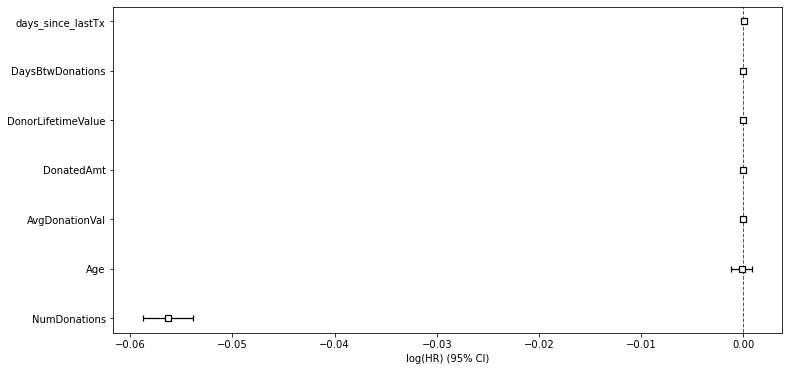

In [153]:
cph.plot()

In [154]:
## We want to visualize the Survival curve at the customer level. Therefore, we have selected only 100 rows).

tr2_rows = survival_analysis2.iloc[0:50]
tr2_rows

,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Age,days_since_lastTx,avg_days_bwtx
ID,,,,,,,,,
100005,100.0,1.0,1.0,1.0,100.000000,1529.624736,26.0,2045,0.0
100006,300.0,3.0,432.0,2.0,100.000000,1529.624736,24.0,416,0.0
100008,1460.0,20.0,17795.0,16.0,73.000000,1116.626057,7.0,492,0.0
100014,25.0,1.0,1.0,1.0,25.000000,382.406184,28.0,9528,0.0
100026,75.0,2.0,110.0,1.0,37.500000,573.609276,25.0,6933,0.0
...,...,...,...,...,...,...,...,...,...
100592,1705.0,41.0,11809.0,27.0,41.592683,636.211966,16.0,9719,1.0
100608,5700.0,11.0,3519.0,10.0,518.181818,7926.237267,16.0,5792,0.0
100619,10.0,1.0,1.0,1.0,10.000000,152.962474,21.0,7687,0.0


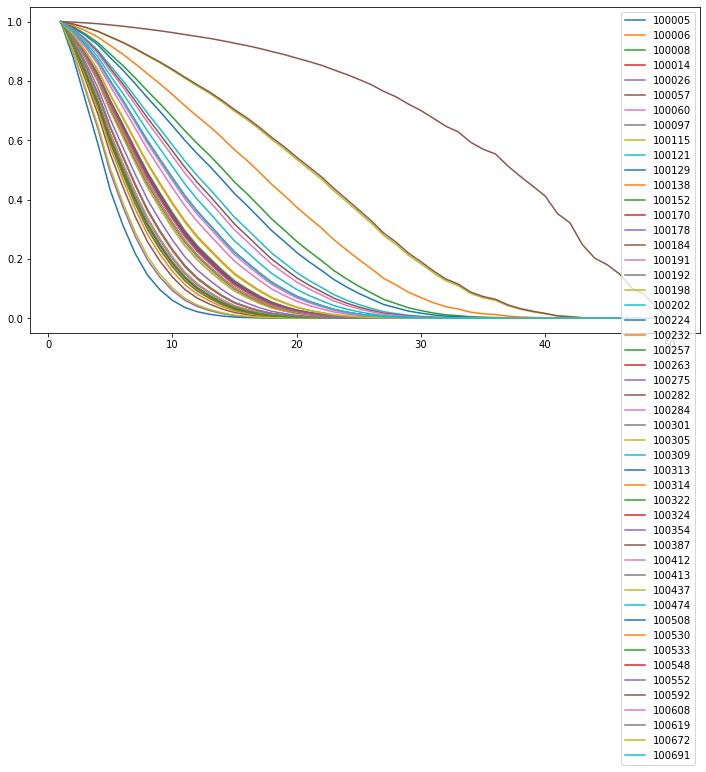

In [155]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.

cph.predict_survival_function(tr2_rows).plot()

In [156]:
## Survival rates of all the donors based on the average days between transactions (pivot = 2000 days)

tr_2_rows = survival_analysis2.iloc[0:24836]
tr_2_rows

,DonatedAmt,NumDonations,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,Age,days_since_lastTx,avg_days_bwtx
ID,,,,,,,,,
100005,100.0,1.0,1.0,1.0,100.0,1529.624736,26.0,2045,0.0
100006,300.0,3.0,432.0,2.0,100.0,1529.624736,24.0,416,0.0
100008,1460.0,20.0,17795.0,16.0,73.0,1116.626057,7.0,492,0.0
100014,25.0,1.0,1.0,1.0,25.0,382.406184,28.0,9528,0.0
100026,75.0,2.0,110.0,1.0,37.5,573.609276,25.0,6933,0.0
...,...,...,...,...,...,...,...,...,...
396075,376.0,4.0,378.0,2.0,94.0,1437.847252,-36.0,6030,0.0
396768,180.0,1.0,1.0,1.0,180.0,2753.324524,-36.0,93,0.0
396871,234.0,12.0,792.0,3.0,19.5,298.276823,-35.0,6244,0.0


In [157]:
len(tr_2_rows)

24836

In [158]:
survival_rates_2 = cph.predict_survival_function(tr_2_rows)
survival_rates_2 = np.transpose(survival_rates_2)


In [159]:
survival_rates_2.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
100005,1.0,0.949678,0.882432,0.807049,0.711913,0.627256,0.540960,0.458751,0.387918,0.321785,...,2.353473e-14,1.481044e-15,5.861964e-19,1.270849e-21,4.049500e-23,1.200859e-25,1.020322e-30,8.059533e-34,2.694578e-45,1.206382e-68
100006,1.0,0.957930,0.901121,0.836566,0.753624,0.678243,0.599621,0.522738,0.454624,0.389116,...,4.521847e-12,4.523164e-13,6.653606e-16,4.031708e-18,2.288695e-19,1.799965e-21,1.081892e-25,2.828855e-28,7.919946e-38,2.898424e-57
100008,1.0,0.982474,0.958073,0.929219,0.890151,0.852384,0.810257,0.765786,0.723043,0.678213,...,2.152817e-05,8.349832e-06,5.708039e-07,6.985871e-08,2.146248e-08,2.924153e-09,5.364458e-11,4.646256e-12,5.460367e-16,5.512913e-24
100014,1.0,0.930456,0.839788,0.741360,0.622276,0.521466,0.424120,0.336938,0.266604,0.205374,...,9.428644e-20,1.984339e-21,3.528395e-26,6.739300e-30,5.485066e-32,1.622316e-35,1.352670e-42,6.311018e-47,6.018266e-63,1.525726e-95
100026,1.0,0.941065,0.863170,0.777090,0.670480,0.577699,0.485377,0.399814,0.328223,0.263433,...,9.265348e-17,3.579045e-18,3.554946e-22,2.610980e-25,4.529025e-27,4.808619e-30,5.205719e-36,1.165733e-39,3.679237e-53,1.249072e-80


In [160]:
survival_rates_2.index.name = 'ID'

In [161]:
survival_rates_2 = survival_rates_2.reset_index()
survival_rates_2['ID'] = survival_rates_2['ID'].astype(int)

In [162]:
survival_rates_2.head()

,ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
0,100005,1.0,0.949678,0.882432,0.807049,0.711913,0.627256,0.540960,0.458751,0.387918,...,2.353473e-14,1.481044e-15,5.861964e-19,1.270849e-21,4.049500e-23,1.200859e-25,1.020322e-30,8.059533e-34,2.694578e-45,1.206382e-68
1,100006,1.0,0.957930,0.901121,0.836566,0.753624,0.678243,0.599621,0.522738,0.454624,...,4.521847e-12,4.523164e-13,6.653606e-16,4.031708e-18,2.288695e-19,1.799965e-21,1.081892e-25,2.828855e-28,7.919946e-38,2.898424e-57
2,100008,1.0,0.982474,0.958073,0.929219,0.890151,0.852384,0.810257,0.765786,0.723043,...,2.152817e-05,8.349832e-06,5.708039e-07,6.985871e-08,2.146248e-08,2.924153e-09,5.364458e-11,4.646256e-12,5.460367e-16,5.512913e-24
3,100014,1.0,0.930456,0.839788,0.741360,0.622276,0.521466,0.424120,0.336938,0.266604,...,9.428644e-20,1.984339e-21,3.528395e-26,6.739300e-30,5.485066e-32,1.622316e-35,1.352670e-42,6.311018e-47,6.018266e-63,1.525726e-95
4,100026,1.0,0.941065,0.863170,0.777090,0.670480,0.577699,0.485377,0.399814,0.328223,...,9.265348e-17,3.579045e-18,3.554946e-22,2.610980e-25,4.529025e-27,4.808619e-30,5.205719e-36,1.165733e-39,3.679237e-53,1.249072e-80


In [163]:
renamed_survival_rates_2 = survival_rates_2.rename(columns={"ID": "ID", 5.0: "5Y_SurvivalRate", 10.0: "10Y_SurvivalRate", 3.0: "3Y_SurvivalRate", 7.0: "7Y_SurvivalRate", 12.0: "12Y_SurvivalRate", 15.0: "15Y_SurvivalRate"})

In [164]:
survival_rates2 = renamed_survival_rates_2[["ID", "3Y_SurvivalRate", "5Y_SurvivalRate", "7Y_SurvivalRate", "10Y_SurvivalRate", "12Y_SurvivalRate", "15Y_SurvivalRate"]]

#### Joining the Demographic info of the donors to the survival rates obtained

In [165]:
survival_analysis_2 = survival_rates2.merge(clutered_data, on='ID', how='left')

In [166]:
survival_analysis_2.columns

Index(['ID', '3Y_SurvivalRate', '5Y_SurvivalRate', '7Y_SurvivalRate',
       '10Y_SurvivalRate', '12Y_SurvivalRate', '15Y_SurvivalRate', 'State',
       'Number of Gifts(2016)', 'P2G Description',
       'Estimated Annual Donations', 'Estimated Gift Capacity',
       'Inclination: Affiliation', 'Inclination: Giving', 'Bequest', 'Income',
       'Real Estate Value', 'ML Capacity', 'ML Likelihood', 'BIRTHDATE',
       'Pledge_Date', 'Grad_Date', 'Chapter', 'GiftOfficer', 'DonatedAmt',
       'NumDonations', 'DaysBtwDonations', 'NumYearsDonated', 'AvgDonationVal',
       'DonorLifetimeValue', 'Percentile_DonationAmt',
       'Percentile_DonationFreq', 'Percentile_DLV', 'cluster_predicted'],
      dtype='object')

In [167]:
survival_analysis_2.drop(['Number of Gifts(2016)', 'Percentile_DonationFreq', 'Percentile_DLV', 'Percentile_DonationAmt', 'ML Likelihood'], axis=1, inplace=True)

In [168]:
survival_analysis_2['BIRTHDATE']= pd.to_datetime(survival_analysis_2['BIRTHDATE'])
survival_analysis_2['Pledge_Date']= pd.to_datetime(survival_analysis_2['Pledge_Date'])

In [169]:
#Calculating the current age and the number of years a donor has been associated with the fraternity.

now = pd.Timestamp('now')
survival_analysis_2['Age'] = (survival_analysis_2['BIRTHDATE'] - now).astype('<m8[Y]')
survival_analysis_2['YearsAssociated'] = (survival_analysis_2['Pledge_Date'] - now).astype('<m8[Y]')

In [170]:
#Calculating the most recent transaction date of each donor

recent_transaction = giving_history.groupby('ID').TRANSACTION_DATE.max().reset_index()
recent_transaction

,ID,TRANSACTION_DATE
0,100005,2015-09-30
1,100006,2020-03-16
2,100008,2019-12-31
3,100014,1995-04-05
4,100026,2002-05-13
...,...,...
29446,475603,2021-01-13
29447,475833,2020-06-30
29448,477202,2020-05-12
29449,478121,2020-12-03


In [171]:
# Most recent tranasaction date

survival_analysis_2['Recent_Trsn_dt'] = recent_transaction['TRANSACTION_DATE']

In [172]:
# Days since the last transaction

survival_analysis_2['days_since_lastTx'] = (now - survival_analysis_2['Recent_Trsn_dt']).dt.days 

In [173]:
# Average days between the transactions

survival_analysis_2['avg_days_bwtx'] = survival_analysis_2['DaysBtwDonations']/giving_history_agg['NumDonations']

In [174]:
survival_analysis_2.head()

,ID,3Y_SurvivalRate,5Y_SurvivalRate,7Y_SurvivalRate,10Y_SurvivalRate,12Y_SurvivalRate,15Y_SurvivalRate,State,P2G Description,Estimated Annual Donations,...,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,cluster_predicted,Age,YearsAssociated,Recent_Trsn_dt,days_since_lastTx,avg_days_bwtx
0,100005,0.882432,0.711913,0.540960,0.321785,0.212901,0.102831,NY,Above Average,$5K-$10K,...,1,1,100.0,1529.624736,0,26.0,44.0,2015-09-30,2045,1.00
1,100006,0.901121,0.753624,0.599621,0.389116,0.275900,0.150541,OH,Excellent,$1K-$5K,...,432,2,100.0,1529.624736,3,24.0,44.0,2020-03-16,416,144.00
2,100008,0.958073,0.890151,0.810257,0.678213,0.588756,0.458884,FL,Above Average,$1K-$5K,...,17795,16,73.0,1116.626057,0,7.0,27.0,2019-12-31,492,889.75
3,100014,0.839788,0.622276,0.424120,0.205374,0.115376,0.041773,CA,Excellent,$5K-$10K,...,1,1,25.0,382.406184,0,28.0,46.0,1995-04-05,9528,1.00
4,100026,0.863170,0.670480,0.485377,0.263433,0.162043,0.068834,AZ,Above Average,$1K-$5K,...,110,1,37.5,573.609276,0,25.0,46.0,2002-05-13,6933,55.00


In [175]:
survival_analysis_2.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_analysis_2.csv')

### Getting the ID counts and average 5yrs survival rate of each cluster 

In [176]:
survival_analysis2_agg = survival_analysis_2.groupby('cluster_predicted').agg({'5Y_SurvivalRate': lambda p:p.sum(),
                                                       'ID':lambda y: y.count()})

In [177]:
survival_analysis2_agg['avg_5y_survivalrate'] = survival_analysis2_agg['5Y_SurvivalRate']/survival_analysis2_agg['ID']

In [178]:
survival_analysis2_agg.drop(['5Y_SurvivalRate'], axis=1, inplace=True)

In [179]:
survival_analysis2_agg.head()

,ID,avg_5y_survivalrate
cluster_predicted,,
0,9685,0.698278
1,5413,0.709061
2,4400,0.700408
3,3433,0.742739
4,1905,0.693526


In [180]:
survival_analysis2_agg.to_csv('C:/Users/Adity/OneDrive/Desktop/Capstone/survival_analysis2_agg.csv')

### Joining Gift Officer and survival rates

In [181]:
gift_officer.dtypes

ID               object
Chapter          object
GiftOfficer    category
dtype: object

In [182]:
survival_analysis_2.dtypes

ID                            int32
3Y_SurvivalRate             float64
5Y_SurvivalRate             float64
7Y_SurvivalRate             float64
10Y_SurvivalRate            float64
                          ...      
Age                         float64
YearsAssociated             float64
Recent_Trsn_dt       datetime64[ns]
days_since_lastTx             int64
avg_days_bwtx               float64
Length: 34, dtype: object

In [183]:
gift_officer['ID'] = gift_officer['ID'].astype(int)

In [184]:
survival_go = gift_officer.merge(survival_analysis_2, on='ID', how='left')

In [185]:
survival_go_1 = gift_officer.loc[gift_officer['ID'].isin(survival_analysis_2['ID'])]

In [186]:
survival_go_1

,ID,Chapter,GiftOfficer
5,228678,Zeta Omicron,"James C. Lawson, CRMC, CDMC"
7,244069,Zeta Omicron,"James C. Lawson, CRMC, CDMC"
11,234245,Zeta Omicron,"James C. Lawson, CRMC, CDMC"
12,148035,Beta Phi,"James C. Lawson, CRMC, CDMC"
13,119788,Epsilon Upsilon,"James C. Lawson, CRMC, CDMC"
...,...,...,...
2487,228934,Zeta Lambda,"Samuel Barrett Smith, CFRE"
2488,196432,Alpha Epsilon,"Samuel Barrett Smith, CFRE"
2489,307628,Iota Sigma,"Samuel Barrett Smith, CFRE"
2490,261628,Eta Mu,"Samuel Barrett Smith, CFRE"


In [187]:
survival_go

,ID,Chapter_x,GiftOfficer_x,3Y_SurvivalRate,5Y_SurvivalRate,7Y_SurvivalRate,10Y_SurvivalRate,12Y_SurvivalRate,15Y_SurvivalRate,State,...,DaysBtwDonations,NumYearsDonated,AvgDonationVal,DonorLifetimeValue,cluster_predicted,Age,YearsAssociated,Recent_Trsn_dt,days_since_lastTx,avg_days_bwtx
0,328919,Delta Eta,"James C. Lawson, CRMC, CDMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,287451,Alpha Upsilon,"James C. Lawson, CRMC, CDMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,309347,Delta Eta,"James C. Lawson, CRMC, CDMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,272012,Eta Beta,"James C. Lawson, CRMC, CDMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,259414,Delta Xi,"James C. Lawson, CRMC, CDMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,228934,Zeta Lambda,"Samuel Barrett Smith, CFRE",0.994473,0.985055,0.973141,0.950996,0.933747,0.904115,VA,...,16175.0,24.0,150.286250,2298.815654,1.0,30.0,-50.0,1991-06-21,10912.0,8087.500000
2488,196432,Alpha Epsilon,"Samuel Barrett Smith, CFRE",0.951986,0.874869,0.785279,0.640133,0.544124,0.408656,WI,...,11031.0,14.0,204.411765,3126.732916,3.0,21.0,39.0,1986-05-09,12781.0,11031.000000
2489,307628,Iota Sigma,"Samuel Barrett Smith, CFRE",0.855102,0.653591,0.463495,0.241935,0.144274,0.058027,WI,...,3549.0,3.0,374.290000,5725.232423,3.0,46.0,-32.0,1994-06-22,9815.0,1774.500000
2490,261628,Eta Mu,"Samuel Barrett Smith, CFRE",0.999981,0.999947,0.999904,0.999824,0.999759,0.999646,WI,...,11080.0,19.0,86.202532,1318.575247,3.0,41.0,NaN,2020-09-15,233.0,481.739130


In [188]:
survival_go_agg = survival_go.groupby('GiftOfficer_x').agg({'5Y_SurvivalRate': lambda p:p.sum(),
                                                       'ID':lambda y: y.count()})

In [189]:
survival_go_agg['avg_5y_survivalrate'] = survival_go_agg['5Y_SurvivalRate']/survival_go_agg['ID']

In [190]:
survival_go_agg.drop(['5Y_SurvivalRate'], axis=1, inplace=True)

In [191]:
survival_go_agg.rename(columns={"ID": "ID counts"})

,ID counts,avg_5y_survivalrate
GiftOfficer_x,,
"Frank J. Raymond, MSW",205,0.500326
"Gregory Morgan, M.Ed.",547,0.361553
"Jackson E. Philbrick, II",440,0.471275
"James C. Lawson, CRMC, CDMC",777,0.348838
Jeffrey Rothenberg,309,0.363885
"Samuel Barrett Smith, CFRE",214,0.639244
